<a href="https://colab.research.google.com/github/aimanmanlai/BinaryExpressionTree/blob/main/DeepFake2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras_vggface
!pip install opencv-python
!pip install --user tqdm
!pip install Keras-Applications

     |████████████████████████████████| 51kB 4.2MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# New Section

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import math
import copy
import numpy as np

from keras.models import Sequential, Model
from keras.layers import Input, Dense, Flatten, Dropout, Activation, Lambda, Permute, Reshape
from keras.layers import Convolution2D, ZeroPadding2D, MaxPooling2D
from keras_vggface.vggface import VGGFace
from keras_vggface import utils
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob
import pandas as pd
import cv2
import scipy.misc
import matplotlib.pyplot as plt
from tqdm import tqdm


In [ ]:
base_path = '/content/drive/MyDrive/deepfake/'
image_gen = ImageDataGenerator(rescale=1./255.)
batch_size = 32

train_flow = image_gen.flow_from_directory(
    base_path + 'development/',
    target_size=(512, 512),
    batch_size=batch_size,
    class_mode='binary'
)

valid_flow = image_gen.flow_from_directory(
    base_path + 'validation/',
    target_size=(512, 512),
    batch_size=batch_size,
    class_mode='binary'
)
test_flow = image_gen.flow_from_directory(
    base_path + 'evaluation/',
    target_size=(512, 512),
    batch_size=1,
    shuffle=False,
    class_mode='binary'
)

Found 600 images belonging to 2 classes.
Found 166 images belonging to 2 classes.
Found 211 images belonging to 2 classes.


In [ ]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
"""
    Propsoed CNN architecture.
    
"""

model = Sequential()

# Pamameters Initialization
input_shape = (512,512,3)
activation = 'relu'
padding = 'same'
droprate = 0.1
epsilon=0.0001

model = Sequential()
model.add(BatchNormalization(input_shape=input_shape))
model.add(Conv2D(filters=16, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))

model.add(Conv2D(filters=32, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(Conv2D(filters=64, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(Conv2D(filters=128, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(Conv2D(filters=256, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(Conv2D(filters=512, kernel_size=3, activation=activation, padding=padding))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Dropout(droprate))

model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(256, kernel_initializer='glorot_normal', activation='relu'))
model.add(Dropout(0.5))
          
model.add(Dense(128, kernel_initializer='glorot_normal', activation='relu'))
model.add(Dropout(0.5))
model.add(Dropout(droprate))
model.add(Dense(1, activation='sigmoid'))

model.summary() # Summary of the architecture

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 512, 512, 3)       12        
_________________________________________________________________
conv2d (Conv2D)              (None, 512, 512, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 256, 256, 16)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256, 256, 16)      64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 128, 128, 32)     

In [ ]:
# Parameters Initialization
from keras.optimizers import RMSprop,SGD,Adam,Adadelta

#opt = rmsprop(lr=0.0001, decay=1e-6)

model.compile(loss='binary_crossentropy',optimizer=Adam(0.0001), metrics=['accuracy'])

In [ ]:
train_steps = 400//batch_size
valid_steps = 50//batch_size
history = model.fit_generator(
    train_flow,
    epochs=100,
    steps_per_epoch = train_steps,
    validation_data = valid_flow,
    validation_steps = valid_steps
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
12/12 [==============================] - 107s 6s/step - loss: 0.7951 - accuracy: 0.4813 - val_loss: 0.6959 - val_accuracy: 0.4688
Epoch 2/100
12/12 [==============================] - 29s 3s/step - loss: 0.7902 - accuracy: 0.5261 - val_loss: 0.6914 - val_accuracy: 0.5312
Epoch 3/100
12/12 [==============================] - 16s 1s/step - loss: 0.7534 - accuracy: 0.5036 - val_loss: 0.7080 - val_accuracy: 0.3750
Epoch 4/100
12/12 [==============================] - 9s 762ms/step - loss: 0.7550 - accuracy: 0.5174 - val_loss: 0.7061 - val_accuracy: 0.4375
Epoch 5/100
12/12 [==============================] - 6s 494ms/step - loss: 0.7201 - accuracy: 0.5598 - val_loss: 0.6918 - val_accuracy: 0.5312
Epoch 6/100
12/12 [==============================] - 5s 422ms/step - loss: 0.7671 - accuracy: 0.5191 - val_loss: 0.6867 - val_accuracy: 0.5625
Epoch 7/100
12/12 [==============================] - 5s 383ms/step - loss: 0.7279 - accuracy: 0.5595 - val_loss: 0.7257 - val_accuracy: 0.5000
Epoc

In [ ]:
model.save("custom_model.h5") # save model

In [ ]:
"""
Plot the training and validation loss
epochs - list of epoch numbers
loss - training loss for each epoch
val_loss - validation loss for each epoch
"""
def plot_loss(epochs, loss, val_loss):
    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'orange', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()
"""
Plot the training and validation accuracy
epochs - list of epoch numbers
acc - training accuracy for each epoch
val_acc - validation accuracy for each epoch
"""
def plot_accuracy(epochs, acc, val_acc):
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'orange', label = 'Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

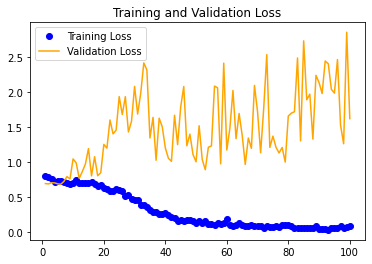

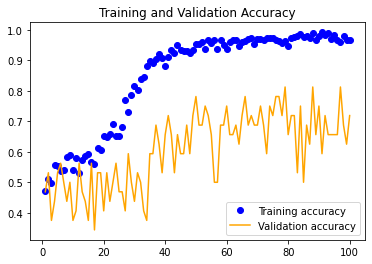

In [ ]:
plot_loss(range(1, len(loss) + 1), loss, val_loss)
plot_accuracy(range(1, len(loss) + 1), acc, val_acc)

In [ ]:
y_pred = model.predict(test_flow)
y_test = test_flow.classes

In [ ]:
from sklearn import metrics
print("ROC AUC Score:", metrics.roc_auc_score(y_test, y_pred))
print("AP Score:", metrics.average_precision_score(y_test, y_pred))
print()
print(metrics.classification_report(y_test, y_pred > 0.5))

ROC AUC Score: 0.806930693069307
AP Score: 0.7840100689992252

              precision    recall  f1-score   support

           0       0.60      0.89      0.72       101
           1       0.82      0.46      0.59       110

    accuracy                           0.67       211
   macro avg       0.71      0.68      0.66       211
weighted avg       0.72      0.67      0.65       211



NEW MODEL - VGG Face


In [ ]:
base_path = '/content/drive/MyDrive/DeepFake_dataset/'
image_gen = ImageDataGenerator(rescale=1./255.)
batch_size = 64

train_flow = image_gen.flow_from_directory(
    base_path + 'development/',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)

valid_flow = image_gen.flow_from_directory(
    base_path + 'validation/',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary'
)

test_flow = image_gen.flow_from_directory(
    base_path + 'evaluation/',
    target_size=(224, 224),
    batch_size=1,
    shuffle=False,
    class_mode='binary'
)

Found 600 images belonging to 2 classes.
Found 166 images belonging to 2 classes.
Found 211 images belonging to 2 classes.


In [ ]:
"""
Plot the training and validation loss
epochs - list of epoch numbers
loss - training loss for each epoch
val_loss - validation loss for each epoch
"""
def plot_loss(epochs, loss, val_loss):
    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'orange', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()
    
    
"""
Plot the training and validation accuracy
epochs - list of epoch numbers
acc - training accuracy for each epoch
val_acc - validation accuracy for each epoch
"""
def plot_accuracy(epochs, acc, val_acc):
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'orange', label = 'Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

In [ ]:
vgg_model = VGGFace(include_top=False, input_shape = (224,224,3))

last_layer = vgg_model.get_layer('pool5').output
flat_layer = Flatten(name='flatten')(last_layer)
fc1 = Dense(2048, activation='relu', name='fc1')(flat_layer)
dense2 = Dense(1, activation='sigmoid', name='dense2')(fc1)

custom_vgg_model = Model(vgg_model.input, dense2)

58916864/58909280 [==============================] - 1s 0us/step


In [ ]:
from keras.optimizers import RMSprop,SGD,Adam,Adadelta

custom_vgg_model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(0.0002), 
    metrics=['acc']
)

In [ ]:
train_steps = 1000//batch_size
valid_steps = 200//batch_size

history = custom_vgg_model.fit_generator(
    train_flow,
    epochs=5,
    steps_per_epoch=train_steps,
    validation_data=valid_flow,
    validation_steps=valid_steps
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5


KeyboardInterrupt: ignored